<a href="https://colab.research.google.com/github/someonewholikelife/git/blob/main/ndquantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-garden

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 317 kB 3.9 MB/s 
  Created wheel for scikit-garden: filename=scikit_garden-0.1.3-cp38-cp38-linux_x86_64.whl size=762404 sha256=bb21f7cc6f93a986b6dd1e9fe74cf254cff5485b528b5fcbde78b35bb74dc99d
  Stored in directory: /root/.cache/pip/wheels/54/ff/a6/00baae3f7f8d52f8281af8a3d4c21adf0495f1606eb16a443d
Successfully built scikit-garden


In [2]:
!pip install -U scikit-learn==0.21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.3 MB/s 
  Created wheel for scikit-learn: filename=scikit_learn-0.21.3-cp38-cp38-linux_x86_64.whl size=18391046 sha256=80bb87598b877d76ff86160493a89e7fc01fdb0d125ff88c5b42d6415da461b0
  Stored in directory: /root/.cache/pip/wheels/50/a7/f7/d987583cd3b9bec683f517206b66b259dfb9b67ee043ce7ac3
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-lea

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from skgarden import RandomForestQuantileRegressor

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [4]:
machta_new_full = pd.read_csv('machta_new_full.csv', index_col=0)
machta_new_full.head()

,Изготовление и монтаж лестниц_act_fact,Изготовление и монтаж балок Б1_act_fact,Устройство свайного основания_act_fact,Устройство термометрической скважины ТС1_act_fact,Монтаж блока ствола Фо5а_act_fact,Монтаж блока ствола Ф-3а_act_fact,Изготовление и монтаж опорной балки ОБ1_act_fact,Монтаж блока ствола Ф-1а_act_fact,Монтаж связей СГ1_act_fact,Монтаж связей СГ2_act_fact,...,Сварщик_res_fact,Сварщики м/к_res_fact,Сварщики-технологи_res_fact,Автокран (в.т.ч. г/п 100 т)_res_fact,Сварщик м/к_res_fact,Сварщик технолог_res_fact,Электролинейщики (вкл. бригадиров)_res_fact,Гусеничный тягач МТЛБу_res_fact,АДД_res_fact,ДЭС 360 КВт_res_fact
31.12.1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
01.12.2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
01.01.2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
01.02.2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
01.03.2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0


In [5]:
def rfqr(df, target_col, q):
  X = df.drop(target_col, axis=1)
  y = df[target_col]

  rfqr = RandomForestQuantileRegressor(random_state=43, min_samples_split=10, n_estimators=1000)
  rfqr.fit(X, y)
  pred = rfqr.predict(X, quantile=q)
  return pred

In [6]:
def Nd_quantile(data, target_col):
  df = data[data[target_col] != 0]

  if df.shape[0] < 30:
    return 'Too small dataset!!!'

  pred_75 = rfqr(df, target_col, q=75)
  pred_25 = rfqr(df, target_col, q=25)

  new_df = df[(df[target_col]>=pred_25) & (df[target_col]<=pred_75)]

  return new_df

In [7]:
def box(df, target_col):
  plt.figure(figsize=(10,6))
  sns.boxplot(df[target_col], orient='v')
  plt.rcParams.update({'font.size': 16})

In [8]:
def target_columns(data, suffix='act_fact'):
  act_fact = []
  for i in data.columns:
    if i.find(suffix) > 0:
      act_fact.append(i)
  return act_fact

In [9]:
act_fact = target_columns(machta_new_full)

aaa = {}
for i in act_fact:
  aaa[i] = Nd_quantile(machta_new_full, i)



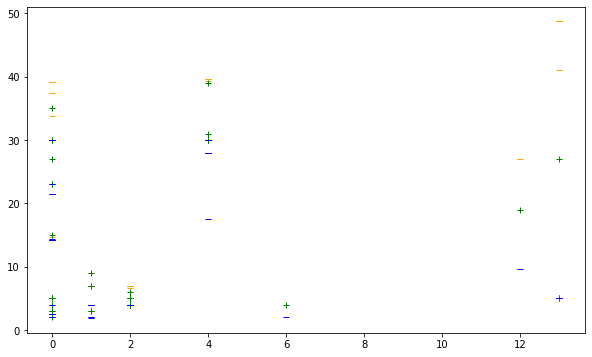

In [10]:
target_col = act_fact[2]
df = machta_new_full[machta_new_full[target_col] != 0]
new_df = Nd_quantile(machta_new_full, target_col)

max_res = 0
for i in new_df.columns:
  if i != target_col and max_res<new_df[i].nunique():
    max_res = new_df[i].nunique()
    res_col = i

plt.figure(figsize=(10,6))
plt.plot(df[res_col], rfqr(df, target_col, 75), '_', color='orange')
plt.plot(new_df[res_col], new_df[target_col], '+', color='green')
plt.plot(df[res_col], rfqr(df, target_col, 25), '_', color='blue')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


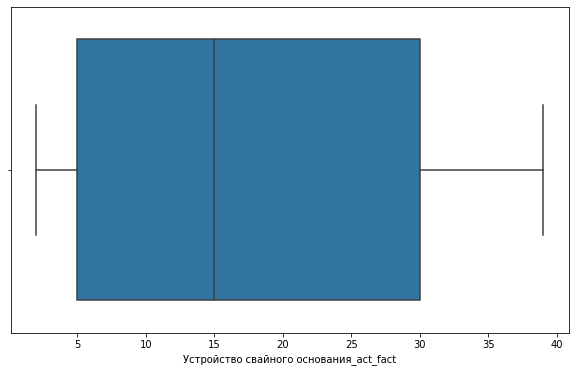

In [11]:
box(new_df, target_col)

In [12]:
df = machta_new_full[machta_new_full[target_col] != 0]

pred_75 = rfqr(df, target_col, q=75)
pred_25 = rfqr(df, target_col, q=25)

delta = pred_75 - pred_25
low = pred_25 - 1.5*delta
high = pred_75 + 1.5*delta

new_df_box = df[(df[target_col]>=low) & (df[target_col]<=high)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


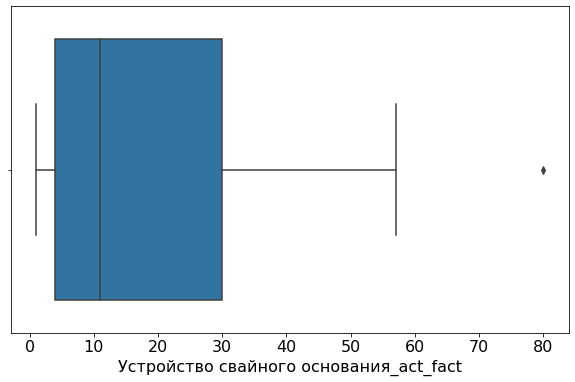

In [13]:
box(new_df_box, target_col)